In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

In [2]:
import matplotlib.pyplot as plt

In [5]:
testt = pd.read_csv('Erdeni_Houses_test.csv')
test = pd.DataFrame(data = testt)
test = test.drop(columns = ['Unnamed: 0', 'Address'])

In [7]:
houses = pd.read_csv('Erdeni_Houses_train.csv')
data = pd.DataFrame(data = houses)
data

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address,Price
0,0,66547.016454,5.846095,6.847298,4.13,27850.822901,"2288 Gary Square Apt. 812\nWest Jose, PR 78536...",1.094880e+06
1,1,53722.008599,6.401391,7.787764,3.30,47649.224665,USS Williams\nFPO AE 65283,1.300389e+06
2,2,64838.492899,6.437157,8.699544,4.02,32921.010068,Unit 2193 Box 7909\nDPO AA 47323-2101,1.382172e+06
3,3,67097.092120,6.086754,7.211963,3.05,27191.506877,"052 Thomas Square Apt. 034\nWrightmouth, OR 04272",1.027428e+06
4,4,75245.465436,8.167820,7.420100,3.42,37410.669928,"879 Martha Route Suite 031\nNew Nichole, VI 60708",1.562887e+06
...,...,...,...,...,...,...,...,...
3995,3995,76223.561256,6.371627,5.342217,2.42,30165.337445,"8456 Rodgers Burg Apt. 215\nSouth Michelle, NM...",1.023944e+06
3996,3996,56685.014442,6.958045,7.502115,3.38,43322.166854,"8584 Darrell Groves\nBennettberg, SD 72404-6826",1.223101e+06
3997,3997,66195.337714,6.507971,6.611861,3.14,37288.923574,"8367 Manuel Road\nNathanfort, AS 36077-1481",1.318598e+06
3998,3998,58694.515017,7.394768,9.269453,4.32,49960.977236,Unit 7385 Box 9302\nDPO AP 21450,1.708631e+06


/tmp/ipykernel_7470/2896792615.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


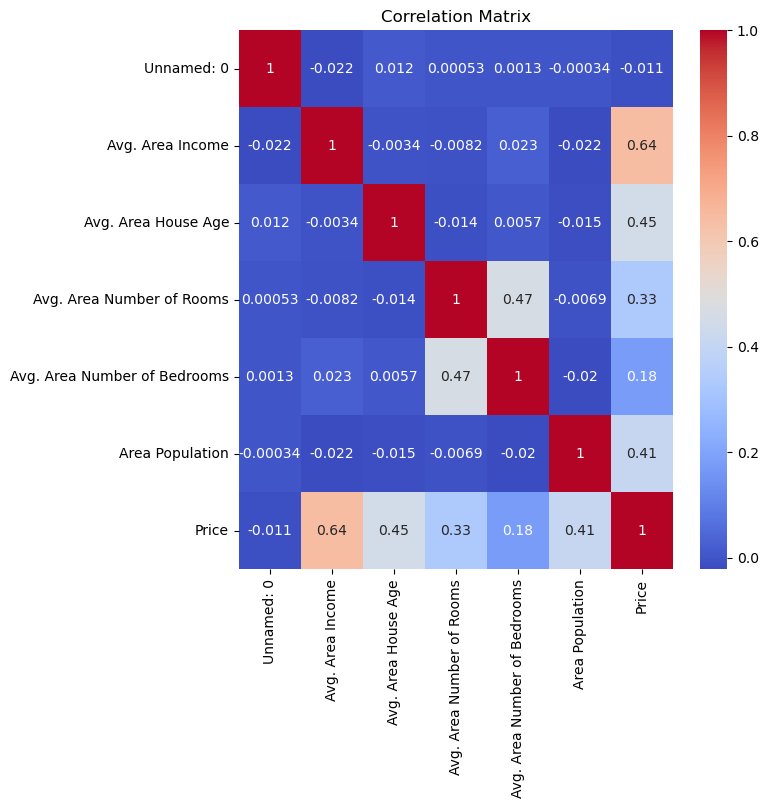

In [8]:

# Построение корреляционной матрицы
correlation_matrix = data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
df_without_str = data[['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population'	, 'Price']]

In [10]:
# Get the top 6 most correlated features for the "GRADE" column
top_corr_features = correlation_matrix['Price'].sort_values(ascending=False)[1:7]

# Print the top 6 most correlated features
print(top_corr_features)

Avg. Area Income                0.641931
Avg. Area House Age             0.449148
Area Population                 0.406757
Avg. Area Number of Rooms       0.330724
Avg. Area Number of Bedrooms    0.176661
Unnamed: 0                     -0.010807
Name: Price, dtype: float64


In [11]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_without_str.values)

In [12]:
df_data_scaled = pd.DataFrame(data_scaled, columns=df_without_str.columns)

In [13]:
data_X = data[['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population']]
data_X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,66547.016454,5.846095,6.847298,4.13,27850.822901
1,53722.008599,6.401391,7.787764,3.30,47649.224665
2,64838.492899,6.437157,8.699544,4.02,32921.010068
3,67097.092120,6.086754,7.211963,3.05,27191.506877
4,75245.465436,8.167820,7.420100,3.42,37410.669928
...,...,...,...,...,...
3995,76223.561256,6.371627,5.342217,2.42,30165.337445
3996,56685.014442,6.958045,7.502115,3.38,43322.166854
3997,66195.337714,6.507971,6.611861,3.14,37288.923574
3998,58694.515017,7.394768,9.269453,4.32,49960.977236


In [14]:
data_Y = data[['Price']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, random_state=42, test_size=0.1)

# LinearRegression - лучший результат: 79716 (MAE), 98754 (RMSE)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linmodel = LinearRegression().fit(X_train, y_train)

In [18]:
y_pred = linmodel.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error

In [20]:
MAE(y_test, y_pred)

79716.08702370383

In [21]:
mean_squared_error(y_test, y_pred, squared=False)

98754.49611773108

# Валидация (Эрдэни)

In [22]:
predictions = linmodel.predict(test)

In [24]:
len(predictions)

1000

In [25]:
df_true = pd.read_csv('Erdeni_Houses_y_true.csv')
df_true

,Unnamed: 0,Price
0,0,1.339096e+06
1,1,1.251794e+06
2,2,1.340095e+06
3,3,1.431508e+06
4,4,1.042374e+06
...,...,...
995,995,1.107031e+06
996,996,1.405505e+06
997,997,1.924156e+06
998,998,1.571254e+06


In [26]:
y_true = df_true['Price'].values
y_true

array([1339096.07724513, 1251794.17883686, 1340094.96620542,
       1431507.62342797, 1042373.52409608, 1555320.50000112,
       1250882.29175707, 1039380.72247961,  832475.18901532,
       1420648.28086982,  613788.32198953, 1702406.03893521,
        913587.0974474 , 1675557.27123079, 1279160.98758547,
        949684.41018076, 1372994.2901085 , 1148563.90358149,
        846939.42878425, 1002192.58207068, 1072253.83365512,
        973197.77534757, 1538985.18909838, 1135079.34529202,
       1618721.13842984, 1158742.82993929, 1268421.10418911,
        985749.78735653,  709348.22373391, 1869313.10698773,
       1476277.52737422, 1638265.39452366, 1431406.51296822,
       1253609.76404087, 1499356.11997188, 1798232.8027843 ,
       1506651.15657352,  680982.7688222 , 1745516.17062634,
       1288069.22644892, 1524106.96472147,  940229.23433028,
       1577017.76000155,  858685.56592496, 1161995.72817709,
       1285312.24421709, 1446597.12205741, 1434323.82515667,
       1537897.11811872,

In [27]:
MAE(y_true, predictions)

80870.97270055496

In [28]:
mean_squared_error(y_true, predictions, squared=False)

100418.79373434171